PARTE1

Contorno 1: Hexagono | Área: 16014.00, Perímetro: 492.62, Centro: (334,331)
Contorno 2: Pentagono | Área: 15408.00, Perímetro: 496.76, Centro: (138,338)
Contorno 3: Rectangulo | Área: 19136.50, Perímetro: 560.24, Centro: (518,321)
Contorno 4: Cuadrado | Área: 12096.00, Perímetro: 437.66, Centro: (514,117)
Contorno 5: Triangulo | Área: 7422.00, Perímetro: 407.02, Centro: (321,135)
Contorno 6: Circulo | Área: 12241.00, Perímetro: 414.48, Centro: (132,122)


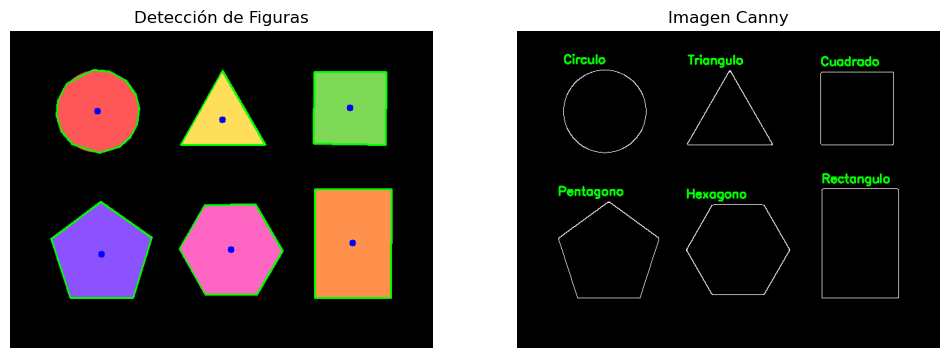

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  

image = cv2.imread('figurascolore.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 10, 150)

canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)
canny_color = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

contorno, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, c in enumerate(contorno):
    epsilon = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)

    M = cv2.moments(c)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    area = cv2.contourArea(c)
    perimetro = cv2.arcLength(c, True)

    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)

    x, y, w, h = cv2.boundingRect(approx)
    texto = ''
    if len(approx) == 3:
        texto = 'Triangulo'
    elif len(approx) == 4:
        aspect_ratio = float(w)/h
        texto = 'Cuadrado' if 0.95 <= aspect_ratio <= 1.05 else 'Rectangulo'
    elif len(approx) == 5:
        texto = 'Pentagono'
    elif len(approx) == 6:
        texto = 'Hexagono'
    elif len(approx) > 10:
        texto = 'Circulo'
    else:
        texto = 'Poligono'

    cv2.putText(canny_color, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    print(f'Contorno {i+1}: {texto} | Área: {area:.2f}, Perímetro: {perimetro:.2f}, Centro: ({cx},{cy})')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detección de Figuras')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(canny_color, cv2.COLOR_BGR2RGB))
plt.title('Imagen Canny')
plt.axis('off')

plt.show()


PARTE2

Contorno 1: Rectangulo | Área: 25101.00, Perímetro: 655.31, Centro: (110,479)
  Momentos de Hu: [0.194698, 0.0101464, 3.00783e-29, 2.63952e-29, 7.42518e-58, -2.46747e-30, -4.24226e-59]

Contorno 2: Circulo | Área: 19945.00, Perímetro: 529.87, Centro: (446,451)
  Momentos de Hu: [0.159174, 3.81107e-06, 2.27716e-10, 3.29218e-15, -2.40907e-27, -5.5308e-18, -1.52373e-27]

Contorno 3: Circulo | Área: 19945.00, Perímetro: 529.87, Centro: (676,449)
  Momentos de Hu: [0.159174, 3.8187e-06, 4.29017e-10, 1.05524e-14, 1.94531e-26, 2.04444e-17, 1.12112e-26]

Contorno 4: Cuadrado | Área: 10566.00, Perímetro: 412.32, Centro: (277,307)
  Momentos de Hu: [0.166739, 7.64433e-05, 2.61334e-07, 5.09827e-09, 1.83498e-16, 4.44063e-11, 3.09744e-17]

Contorno 5: Rectangulo | Área: 11531.00, Perímetro: 432.47, Centro: (344,132)
  Momentos de Hu: [0.166922, 0.000138245, 4.99488e-07, 7.34224e-09, -2.41098e-16, 5.39061e-11, 3.73595e-16]

Contorno 6: Circulo | Área: 19960.00, Perímetro: 533.87, Centro: (163,128)
 

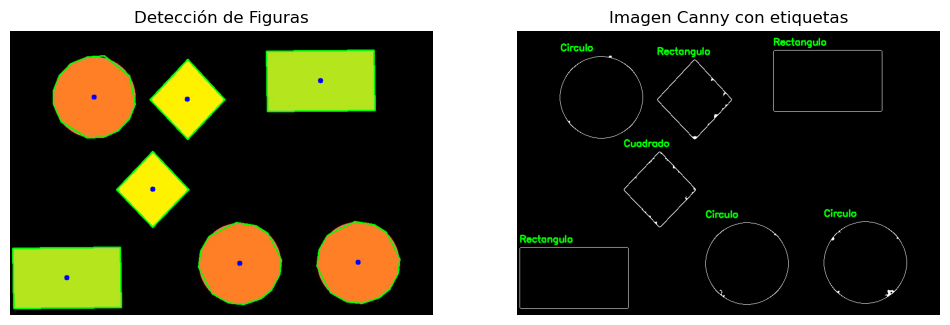

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  

image = cv2.imread('figurascolore2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 10, 150)

canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)
canny_color = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

contornos, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, c in enumerate(contornos):
    epsilon = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    vertices = len(approx)

    M = cv2.moments(c)
    huMoments = cv2.HuMoments(M).flatten()

    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    area = cv2.contourArea(c)
    perimetro = cv2.arcLength(c, True)

    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)

    if vertices == 3:
        texto = 'Triangulo'
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w)/h
        texto = 'Cuadrado' if 0.95 <= aspect_ratio <= 1.05 else 'Rectangulo'
    elif vertices == 5:
        texto = 'Pentagono'
    elif vertices == 6:
        texto = 'Hexagono'
    elif vertices > 10:
        texto = 'Circulo'
    else:
        texto = 'Poligono'

    x, y, w, h = cv2.boundingRect(approx)
    cv2.putText(canny_color, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    print(f'Contorno {i+1}: {texto} | Área: {area:.2f}, Perímetro: {perimetro:.2f}, Centro: ({cx},{cy})')
    print(f'  Momentos de Hu: {[float(f"{h:.5e}") for h in huMoments]}\n')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detección de Figuras')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(canny_color, cv2.COLOR_BGR2RGB))
plt.title('Imagen Canny con etiquetas')
plt.axis('off')

plt.show()
